In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

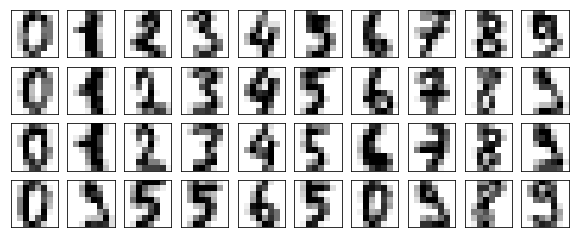

In [3]:
def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize = (10,4),
                          subplot_kw = {'xticks':[],'yticks':[]}
                          )
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary')
        
plot_digits(digits.data)

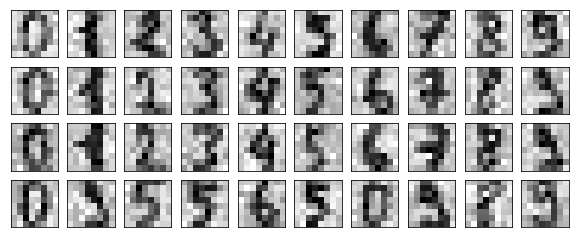

In [4]:
# 给数据加上噪音
np.random.RandomState(42)
# 在指定的数据集中，随机抽取服从正态分布的数据
# 两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = np.random.normal(digits.data,2)
plot_digits(noisy)

In [6]:
# 降维 
pca = PCA(0.5).fit(noisy)
x_dr = pca.transform(noisy)
x_dr.shape

(1797, 6)

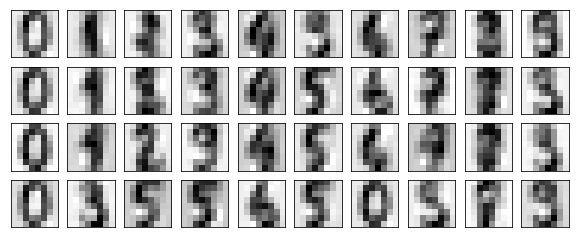

In [7]:
# 逆转降维结果，实现降噪
without_noise = pca.inverse_transform(x_dr)
plot_digits(without_noise)